# <font color = Red>论文：Characterization of Encrypted and VPN Traffic using Time-related Features</font>

In [1]:
from scipy.io import arff
import pandas as pd
import os

In [2]:
dir_A1 = 'H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A1'
dir_A2 = 'H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2'
dir_B = 'H:\VPN-nonVPN(ISCXVPN2016)\Scenario B'
files_A1 = os.listdir(dir_A1) #原数据集中60s-VPN存在错误，已删除多余 ',,,,,,,,,,'
files_A2 = os.listdir(dir_A2)
files_B = os.listdir(dir_B)

# <font color = Red>一、scenarios A ：首先分类VPN/noVPN;然后细分</font>

# A1
## 15s,30s,60,120s的timeout，label为 VPN / NoVPN

In [3]:
df_A1 = {}
for file in files_A1:
    print(dir_A1 + '/' + file)
    data, meta = arff.loadarff(dir_A1 + "/" + file)
    s = file.split('-')[2]
    df_A1[s] = pd.DataFrame(data)

H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A1/TimeBasedFeatures-Dataset-120s-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A1/TimeBasedFeatures-Dataset-15s-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A1/TimeBasedFeatures-Dataset-30s-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A1/TimeBasedFeatures-Dataset-60s-VPN.arff


In [4]:
df_A1.keys()

dict_keys(['120s', '15s', '30s', '60s'])

In [5]:
df_A1['15s'].head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'


## 4种情况各选取24个特征，其中60s有两个特征与其他不同

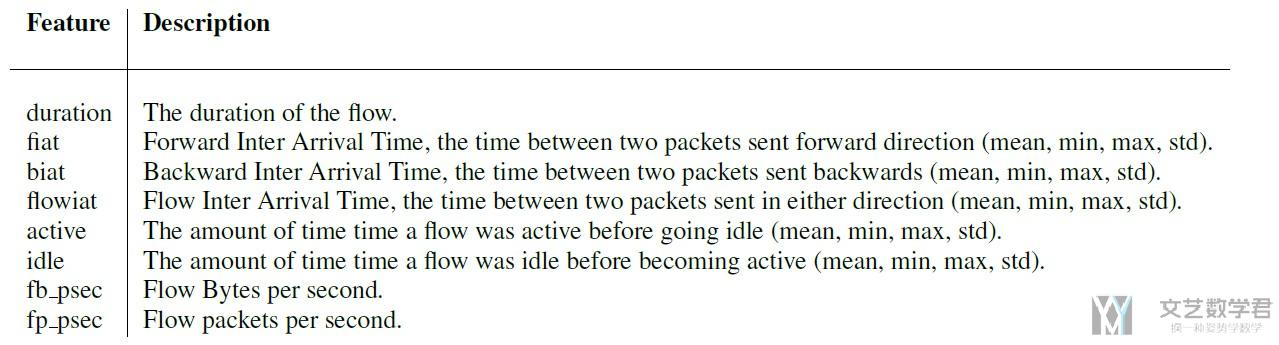

In [6]:
df_A1['15s'].describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,...,4.768167e+05,1.035025e+06,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,...,1.404428e+06,3.534085e+06,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,...,9.577449e+03,5.574602e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,...,8.412602e+04,7.518175e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,...,3.119330e+05,7.659213e+05,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.070000e+07,1.360000e+08,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


In [7]:
print('15s :',len(df_A1['15s'].columns.values),'个特征；流持续时间、单向流包间隔、双向流包间隔、每秒字节数、每秒包数、空闲/活动时间')
print(df_A1['15s'].columns.values)

15s : 24 个特征；流持续时间、单向流包间隔、双向流包间隔、每秒字节数、每秒包数、空闲/活动时间
['duration' 'total_fiat' 'total_biat' 'min_fiat' 'min_biat' 'max_fiat'
 'max_biat' 'mean_fiat' 'mean_biat' 'flowPktsPerSecond'
 'flowBytesPerSecond' 'min_flowiat' 'max_flowiat' 'mean_flowiat'
 'std_flowiat' 'min_active' 'mean_active' 'max_active' 'std_active'
 'min_idle' 'mean_idle' 'max_idle' 'std_idle' 'class1']


In [8]:
print('60s : 去除min_fiat, min_biat，增加std_fiat, std_biat')
df_A1['60s'].columns.values

60s : 去除min_fiat, min_biat，增加std_fiat, std_biat


array(['duration', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat',
       'mean_fiat', 'mean_biat', 'std_fiat', 'std_biat',
       'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat',
       'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active',
       'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle',
       'max_idle', 'std_idle', 'class1'], dtype=object)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# color_map = dict(zip(df_A1['15s'].class1.unique(),['blue','red']))
# for label, group in df_A1['15s'].groupby('class1'):
#     plt.scatter(group['duration'], group['total_fiat'],
#                color=color_map[label],
#                alpha=0.3,edgecolor=None,
#                label=label)
# plt.legend(frameon=True, title='Name')
# plt.xlabel('duration')
# plt.ylabel('total_fiat')


# features_cols = df_A1['60s'].columns[:10]
# sns.pairplot(data=df_A1['60s'],hue='class1',vars=features_cols)

## KNN
### 归一化0.83
### 不归一化0.82

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
def knn_eval(df):
    class_map = {b'Non-VPN':0, b'VPN':1}
    
    df['label'] = df['class1'].map(class_map)
    train, test =  train_test_split(df, test_size=.1)
    x_train, x_test = train.iloc[:,:-2], test.iloc[:,:-2]
    y_train, y_test = train['label'], test['label']
    
    #保存最优K
    acc_max = [1,0,0,0,0] # [k,acc,rec,model,metrics]
    for k in range(1,16,2):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        acc = model.score(x_test, y_test)    
        if acc > acc_max[1]:
            pre_y = model.predict(x_test)
            rec = metrics.recall_score(y_test, pre_y)
            met = metrics.classification_report(y_test, pre_y)
            acc_max = [k,acc,rec,model,met]
    return acc_max

In [13]:
knn_metric = {}
timeouts = ['15s','30s','60s','120s']
for t in timeouts:
    #归一化
    df_norm = (df_A1[t].iloc[:,:-1] - df_A1[t].iloc[:,:-1].min()) / (df_A1[t].iloc[:,:-1].max() - df_A1[t].iloc[:,:-1].min())
    df_norm['class1'] = df_A1[t]['class1']
    res = knn_eval(df_norm)
    knn_metric[t] = res

In [14]:
for t in knn_metric.keys():
    print('='*20)
    print('timeout = ',t)
    print('k = ',knn_metric[t][0])
    print('acc = ',knn_metric[t][1])
    print('recall = ',knn_metric[t][2])
    print('------')
    print(knn_metric[t][4])

timeout =  15s
k =  1
acc =  0.8400852878464818
recall =  0.824
------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       876
           1       0.87      0.82      0.85      1000

    accuracy                           0.84      1876
   macro avg       0.84      0.84      0.84      1876
weighted avg       0.84      0.84      0.84      1876

timeout =  30s
k =  1
acc =  0.834924965893588
recall =  0.8701799485861182
------
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       688
           1       0.83      0.87      0.85       778

    accuracy                           0.83      1466
   macro avg       0.84      0.83      0.83      1466
weighted avg       0.84      0.83      0.83      1466

timeout =  60s
k =  1
acc =  0.8460051546391752
recall =  0.8235294117647058
------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       855

## 决策树

In [15]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [16]:
df_norm_tmp = (df_A1['15s'].iloc[:,:-1] - df_A1['15s'].iloc[:,:-1].min()) / (df_A1['15s'].iloc[:,:-1].max() - df_A1['15s'].iloc[:,:-1].min())
df_norm_tmp['class1'] = df_A1['15s']['class1']

class_map = {b'Non-VPN':0, b'VPN':1}
df_norm_tmp['label'] = df_norm_tmp['class1'].map(class_map)

train_tmp, test_tmp =  train_test_split(df_norm_tmp, test_size=.1)
x_train_tmp, x_test_tmp = train_tmp.iloc[:,:-2], test_tmp.iloc[:,:-2]
y_train_tmp, y_test_tmp = train_tmp['label'], test_tmp['label']

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train_tmp, y_train_tmp)

In [17]:
def tree_eval(df):
    class_map = {b'Non-VPN':0, b'VPN':1}
    
    df['label'] = df['class1'].map(class_map)
    train, test =  train_test_split(df, test_size=.1)
    x_train, x_test = train.iloc[:,:-2], test.iloc[:,:-2]
    y_train, y_test = train['label'], test['label']
    
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)    
    pre_y = model.predict(x_test)
    rec = metrics.recall_score(y_test, pre_y)
    met = metrics.classification_report(y_test, pre_y)
    acc_max = [acc,rec,model,met]
    return acc_max

In [18]:
tree_metric = {}
timeouts = ['15s','30s','60s','120s']
for t in timeouts:
    #归一化
    df_norm = (df_A1[t].iloc[:,:-1] - df_A1[t].iloc[:,:-1].min()) / (df_A1[t].iloc[:,:-1].max() - df_A1[t].iloc[:,:-1].min())
    df_norm['class1'] = df_A1[t]['class1']
    res = tree_eval(df_norm)
    tree_metric[t] = res

In [19]:
for t in tree_metric.keys():
    print('='*20)
    print('timeout = ',t)
    print('acc = ',tree_metric[t][0])
    print('recall = ',tree_metric[t][1])
    print('------')
    print(tree_metric[t][3])

timeout =  15s
acc =  0.8933901918976546
recall =  0.9148494288681205
------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       913
           1       0.88      0.91      0.90       963

    accuracy                           0.89      1876
   macro avg       0.89      0.89      0.89      1876
weighted avg       0.89      0.89      0.89      1876

timeout =  30s
acc =  0.8533424283765347
recall =  0.8804204993429697
------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       705
           1       0.84      0.88      0.86       761

    accuracy                           0.85      1466
   macro avg       0.85      0.85      0.85      1466
weighted avg       0.85      0.85      0.85      1466

timeout =  60s
acc =  0.8537371134020618
recall =  0.858600583090379
------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       866
       

In [20]:
# # 可视化决策树
# import graphviz

# dot_data=export_graphviz(tree_metric['15s'][2],out_file=None,feature_names=
#          list(df_A1[t].columns.values[:-1]),class_names= ['Non-VPN','VPN'],filled=
#          True,rounded=True,special_characters=True)
# graph=graphviz.Source(dot_data)
# graph.view()

## 4种timeout下，knn和决策树各自的准确率及召回率
### 决策树普遍优于KNN

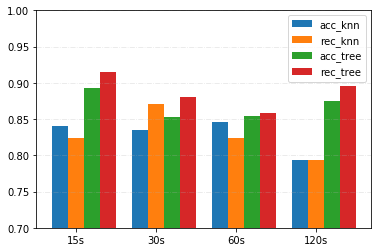

In [21]:
acc_knn = []
rec_knn = []
acc_tree = []
rec_tree = []
for t in timeouts:
    acc_knn.append(knn_metric[t][1])
    rec_knn.append(knn_metric[t][2])
    acc_tree.append(tree_metric[t][0])
    rec_tree.append(tree_metric[t][1])

# x为各柱体左边界坐标
x =np.arange(len(timeouts))
total_width, n = 0.8, 4
width = total_width / n

# 重新拟定x的坐标
x = x - (total_width - width) / 2

#设置刻度
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(.05)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

plt.ylim(.7, 1)
plt.grid(axis="y",linestyle='-.',alpha=0.3)
plt.bar(x, acc_knn, width=width, label='acc_knn')
plt.bar(x + width, rec_knn, width=width, label='rec_knn',tick_label = timeouts)
plt.bar(x + 2*width, acc_tree, width=width, label='acc_tree')
plt.bar(x + 3*width, rec_tree, width=width, label='rec_tree')
# plt.legend(bbox_to_anchor=(1,.8), loc='center left')
plt.legend()
plt.show()

# A2: 
## 15s,30s,60,120s的timeout，分别在VPN 和 NoVPN下的app细分

In [22]:
df_A2 = {}
for file in files_A2:
    print(dir_A2 + '/' + file)
    data, meta = arff.loadarff(dir_A2 + "/" + file)
    timeout = file.split('-')[2]
    isvpn = 'VPN' if file.split('-')[3] != 'NO' else 'noVPN'
    df_A2.setdefault(timeout,{})
    df_A2[timeout].setdefault(isvpn, pd.DataFrame(data)) #setdefault 实现字典嵌套

H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-120s-NO-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-120s-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-15s-NO-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-15s-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-30s-NO-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-30s-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-60s-NO-VPN.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario-A2/TimeBasedFeatures-Dataset-60s-VPN.arff


In [23]:
df_A2.keys()

dict_keys(['120s', '15s', '30s', '60s'])

In [24]:
df_A2['120s'].keys()

dict_keys(['noVPN', 'VPN'])

In [25]:
df_A2['15s']['VPN'].head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,601.077345,370.009450,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-BROWSING'
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1413.911977,998.912938,1648.183118,...,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-BROWSING'
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,10604.986540,5204.310999,283.541956,...,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000,b'VPN-BROWSING'
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,15799.737527,6497.646744,215.416324,...,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471,b'VPN-BROWSING'
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,593.822157,363.104167,3763.781101,...,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-BROWSING'


## 8种情况选取相同的24个特征

In [26]:
print('15s-VPN:',len(df_A2['15s']['VPN'].columns.values),'个特征')
print(df_A2['15s']['VPN'].columns.values)

15s-VPN: 24 个特征
['duration' 'total_fiat' 'total_biat' 'min_fiat' 'min_biat' 'max_fiat'
 'max_biat' 'mean_fiat' 'mean_biat' 'flowPktsPerSecond'
 'flowBytesPerSecond' 'min_flowiat' 'max_flowiat' 'mean_flowiat'
 'std_flowiat' 'min_active' 'mean_active' 'max_active' 'std_active'
 'min_idle' 'mean_idle' 'max_idle' 'std_idle' 'class1']


In [27]:
class_map = dict(zip(df_A2['15s']['VPN'].class1.unique(),np.arange(7)))
class_map.update(dict(zip(df_A2['15s']['noVPN'].class1.unique(),np.arange(7,14))))
class_map

{b'VPN-BROWSING': 0,
 b'VPN-CHAT': 1,
 b'VPN-FT': 2,
 b'VPN-MAIL': 3,
 b'VPN-P2P': 4,
 b'VPN-STREAMING': 5,
 b'VPN-VOIP': 6,
 b'BROWSING': 7,
 b'CHAT': 8,
 b'FT': 9,
 b'MAIL': 10,
 b'P2P': 11,
 b'STREAMING': 12,
 b'VOIP': 13}

In [28]:
def knn_A2(df):
    df['label'] = df['class1'].map(class_map)
    train, test =  train_test_split(df, test_size=.1)
    x_train, x_test = train.iloc[:,:-2], test.iloc[:,:-2]
    y_train, y_test = train['label'], test['label']
    
    #保存最优K
    acc_max = [1,0,0,0,0] # [k,acc,rec,precision,model,metrics]
    for k in range(1,16):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        acc = model.score(x_test, y_test)    
        if acc > acc_max[1]:
            pre_y = model.predict(x_test)
            rec = metrics.recall_score(y_test, pre_y, average='micro')
            met = metrics.classification_report(y_test, pre_y, output_dict = True)
            acc_max = [k,acc,rec,model,met]
    return acc_max

In [29]:
knn_metric_A2 = {}
timeouts = ['15s','30s','60s','120s']
for t in timeouts:
    for v in ['VPN','noVPN']:
        df_norm_A2 = (df_A2[t][v].iloc[:,:-1] - df_A2[t][v].iloc[:,:-1].min()) / (df_A2[t][v].iloc[:,:-1].max() - df_A2[t][v].iloc[:,:-1].min())
        df_norm_A2['class1'] = df_A2[t][v]['class1']
        res = knn_A2(df_norm_A2)
        knn_metric_A2.setdefault(t,{})
        knn_metric_A2[t][v] =  res


In [30]:
for t in knn_metric_A2.keys():
    for v in ['VPN','noVPN']:
        print('='*50)
        print('timeout = ',t)
        print(v)
        print('k = ',knn_metric_A2[t][v][0])
        print('acc = ',knn_metric_A2[t][v][1])
        print('recall = ',knn_metric_A2[t][v][2])
        print('-'*50)
        print(knn_metric_A2[t][v][4])

timeout =  15s
VPN
k =  1
acc =  0.8459183673469388
recall =  0.8459183673469388
--------------------------------------------------
{'0': {'precision': 0.872, 'recall': 0.8384615384615385, 'f1-score': 0.8549019607843137, 'support': 260}, '1': {'precision': 0.5462184873949579, 'recall': 0.7386363636363636, 'f1-score': 0.6280193236714975, 'support': 88}, '2': {'precision': 0.8012048192771084, 'recall': 0.7150537634408602, 'f1-score': 0.7556818181818181, 'support': 186}, '3': {'precision': 0.7450980392156863, 'recall': 0.7450980392156863, 'f1-score': 0.7450980392156863, 'support': 51}, '4': {'precision': 0.8431372549019608, 'recall': 0.8775510204081632, 'f1-score': 0.86, 'support': 98}, '5': {'precision': 0.9655172413793104, 'recall': 0.9333333333333333, 'f1-score': 0.9491525423728815, 'support': 60}, '6': {'precision': 0.9957264957264957, 'recall': 0.9831223628691983, 'f1-score': 0.9893842887473461, 'support': 237}, 'accuracy': 0.8459183673469388, 'macro avg': {'precision': 0.82412890541

In [31]:
# 从 s 提取7类指标 res字典
def knn_list(s, res):
    '''
    s: dict
    res: dict
    '''
    precs = []
    recs = []
    s = list(s.values())
    for i in range(7):
        precs.append(s[i]['precision'])
        recs.append(s[i]['recall'])
    res['precision'] = precs
    res['recall'] = recs
    return res

knn_metric_A2_res = {}

for t in timeouts:
    knn_metric_A2_res.setdefault(t,{})
    for v in ['VPN','noVPN']:
        knn_metric_A2_res[t].setdefault(v,{})
        knn_metric_A2_res[t][v] = knn_list(knn_metric_A2[t][v][4], knn_metric_A2_res[t][v])
print(knn_metric_A2_res)

{'15s': {'VPN': {'precision': [0.872, 0.5462184873949579, 0.8012048192771084, 0.7450980392156863, 0.8431372549019608, 0.9655172413793104, 0.9957264957264957], 'recall': [0.8384615384615385, 0.7386363636363636, 0.7150537634408602, 0.7450980392156863, 0.8775510204081632, 0.9333333333333333, 0.9831223628691983]}, 'noVPN': {'precision': [0.8571428571428571, 0.6463414634146342, 0.75, 0.7727272727272727, 0.9247311827956989, 0.7142857142857143, 0.9896551724137931], 'recall': [0.8605577689243028, 0.6794871794871795, 0.8446601941747572, 0.7391304347826086, 0.8514851485148515, 0.6122448979591837, 0.9828767123287672]}}, '30s': {'VPN': {'precision': [0.8385826771653543, 0.6197183098591549, 0.8032786885245902, 0.9512195121951219, 0.7789473684210526, 0.8518518518518519, 0.983739837398374], 'recall': [0.902542372881356, 0.5866666666666667, 0.7424242424242424, 0.9176470588235294, 0.8131868131868132, 0.7666666666666667, 0.968]}, 'noVPN': {'precision': [0.9066147859922179, 0.7037037037037037, 0.80373831

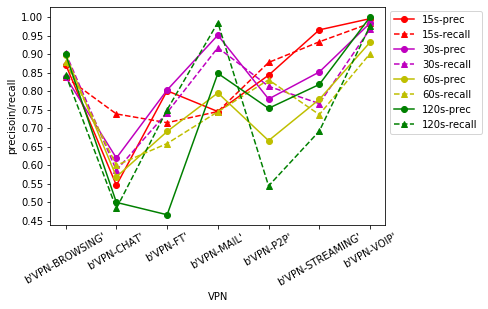

In [32]:
x = range(0,7)
p1, = plt.plot(x, knn_metric_A2_res['15s']['VPN']['precision'], '-o', color = 'r')
p2, = plt.plot(x, knn_metric_A2_res['15s']['VPN']['recall'], '--^', color = 'r')

p3, = plt.plot(x, knn_metric_A2_res['30s']['VPN']['precision'],  '-o', color = 'm')
p4, = plt.plot(x, knn_metric_A2_res['30s']['VPN']['recall'], '--^', color = 'm')

p5, = plt.plot(x, knn_metric_A2_res['60s']['VPN']['precision'],'-o', color = 'y')
p6, = plt.plot(x, knn_metric_A2_res['60s']['VPN']['recall'], '--^', color = 'y')

p7, = plt.plot(x, knn_metric_A2_res['120s']['VPN']['precision'], '-o', color = 'g')
p8, = plt.plot(x, knn_metric_A2_res['120s']['VPN']['recall'], '--^', color = 'g')

plt.xlabel('VPN')
plt.ylabel('precisoin/recall')
#设置刻度
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(.05)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

_xtick_labels = list(class_map.keys())[:7]
plt.xticks(x, _xtick_labels, rotation=30)
plt.legend(handles = [p1,p2,p3,p4,p5,p6,p7,p8], labels = ['15s-prec','15s-recall',
                                       '30s-prec','30s-recall',
                                       '60s-prec','60s-recall',
                                       '120s-prec','120s-recall'],
          bbox_to_anchor=(1,.7), loc='center left')
plt.show()

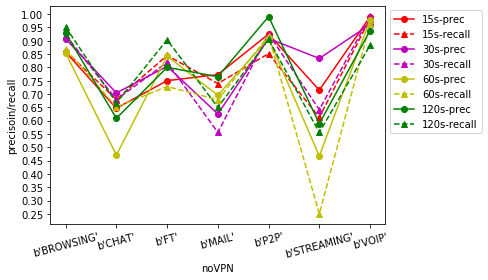

In [33]:
x = range(0,7)
p1, = plt.plot(x, knn_metric_A2_res['15s']['noVPN']['precision'], '-o', color = 'r')
p2, = plt.plot(x, knn_metric_A2_res['15s']['noVPN']['recall'], '--^', color = 'r')

p3, = plt.plot(x, knn_metric_A2_res['30s']['noVPN']['precision'],  '-o', color = 'm')
p4, = plt.plot(x, knn_metric_A2_res['30s']['noVPN']['recall'], '--^', color = 'm')

p5, = plt.plot(x, knn_metric_A2_res['60s']['noVPN']['precision'],'-o', color = 'y')
p6, = plt.plot(x, knn_metric_A2_res['60s']['noVPN']['recall'], '--^', color = 'y')

p7, = plt.plot(x, knn_metric_A2_res['120s']['noVPN']['precision'], '-o', color = 'g')
p8, = plt.plot(x, knn_metric_A2_res['120s']['noVPN']['recall'], '--^', color = 'g')

plt.xlabel('noVPN')
plt.ylabel('precisoin/recall')
#设置刻度
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(.05)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

_xtick_labels = list(class_map.keys())[7:14]
plt.xticks(x, _xtick_labels, rotation=15)
plt.legend(handles = [p1,p2,p3,p4,p5,p6,p7,p8], labels = ['15s-prec','15s-recall',
                                       '30s-prec','30s-recall',
                                       '60s-prec','60s-recall',
                                       '120s-prec','120s-recall'],
          bbox_to_anchor=(1,.7), loc='center left')
plt.show()

# <font color = Red>二、scenarios B: VPN/noVPN一起分类</font>

In [34]:
df_B = {}
for file in files_B:
    print(dir_B + '/' + file)
    data, meta = arff.loadarff(dir_B + "/" + file)
    if len(file.split('-')) == 4:
        timeout = file.split('-')[2]
        isAllinOne = 'AllinOne'
    else:
        timeout = file.split('-')[2].split('.')[0]
        isAllinOne = 'noAllinOne'
    df_B.setdefault(timeout,{})
    df_B[timeout].setdefault(isAllinOne, pd.DataFrame(data)) #setdefault 实现字典嵌套

H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-120s-AllinOne.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-120s.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-15s-AllinOne.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-15s.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-30s-AllinOne.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-30s.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-60s-AllinOne.arff
H:\VPN-nonVPN(ISCXVPN2016)\Scenario B/TimeBasedFeatures-Dataset-60s.arff


In [35]:
df_B.keys()

dict_keys(['120s', '15s', '30s', '60s'])

In [36]:
df_B['120s'].keys()

dict_keys(['AllinOne', 'noAllinOne'])

In [37]:
df_B['15s']['AllinOne'].head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'CHAT'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'CHAT'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'CHAT'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'CHAT'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'CHAT'


In [38]:
df_B['15s']['noAllinOne'].head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'CHAT'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'CHAT'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'CHAT'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'CHAT'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'CHAT'


In [39]:
c = df_B['15s']['noAllinOne'].values == df_B['15s']['AllinOne'].values
np.argwhere(c==False)

array([[ 5465,    23],
       [ 5466,    23],
       [ 5467,    23],
       ...,
       [17755,    23],
       [17756,    23],
       [17757,    23]], dtype=int64)

In [40]:
df_B['15s']['noAllinOne'].iloc[5465:5470]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
5465,11552328.0,201874.0,201138.0,5834505.0,5833801.0,2888057.750,2.888055e+06,2.881316e+06,2.881293e+06,0.865626,...,2.329982e+06,5717726.0,5.776116e+06,5834505.0,8.257522e+04,4876225.0,5.354964e+06,5833704.0,6.770399e+05,b'VPN-CHAT'
5466,6082219.0,9457.0,48233.0,5092501.0,4885150.0,1520554.750,1.481219e+06,2.404067e+06,2.291113e+06,1.644137,...,1.588967e+06,4885236.0,4.885236e+06,4885236.0,0.000000e+00,4885150.0,4.885150e+06,4885150.0,0.000000e+00,b'VPN-CHAT'
5467,13466300.0,1392.0,40153.0,6138030.0,6136317.0,1346630.000,1.330034e+06,1.883529e+06,1.886693e+06,1.633708,...,1.390557e+06,1506391.0,3.263053e+06,7010161.0,2.536930e+06,1306411.0,2.893614e+06,5930227.0,2.092512e+06,b'VPN-CHAT'
5468,13764893.0,200273.0,200191.0,5797648.0,5591580.0,2752964.400,2.752954e+06,2.362064e+06,2.339293e+06,0.871783,...,2.016971e+06,1026809.0,3.441206e+06,5591669.0,2.104913e+06,1026695.0,3.339582e+06,5591580.0,2.098630e+06,b'VPN-CHAT'
5469,12306851.0,967.0,950.0,5430769.0,5426974.0,1538356.375,1.344278e+06,2.048348e+06,1.923066e+06,1.543856,...,1.440157e+06,2905845.0,4.032853e+06,6038944.0,1.741742e+06,2488259.0,3.620838e+06,5220546.0,1.424782e+06,b'VPN-CHAT'


In [41]:
df_B['15s']['AllinOne'].iloc[5465:5470]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
5465,11552328.0,201874.0,201138.0,5834505.0,5833801.0,2888057.750,2.888055e+06,2.881316e+06,2.881293e+06,0.865626,...,2.329982e+06,5717726.0,5.776116e+06,5834505.0,8.257522e+04,4876225.0,5.354964e+06,5833704.0,6.770399e+05,b'CHAT'
5466,6082219.0,9457.0,48233.0,5092501.0,4885150.0,1520554.750,1.481219e+06,2.404067e+06,2.291113e+06,1.644137,...,1.588967e+06,4885236.0,4.885236e+06,4885236.0,0.000000e+00,4885150.0,4.885150e+06,4885150.0,0.000000e+00,b'CHAT'
5467,13466300.0,1392.0,40153.0,6138030.0,6136317.0,1346630.000,1.330034e+06,1.883529e+06,1.886693e+06,1.633708,...,1.390557e+06,1506391.0,3.263053e+06,7010161.0,2.536930e+06,1306411.0,2.893614e+06,5930227.0,2.092512e+06,b'CHAT'
5468,13764893.0,200273.0,200191.0,5797648.0,5591580.0,2752964.400,2.752954e+06,2.362064e+06,2.339293e+06,0.871783,...,2.016971e+06,1026809.0,3.441206e+06,5591669.0,2.104913e+06,1026695.0,3.339582e+06,5591580.0,2.098630e+06,b'CHAT'
5469,12306851.0,967.0,950.0,5430769.0,5426974.0,1538356.375,1.344278e+06,2.048348e+06,1.923066e+06,1.543856,...,1.440157e+06,2905845.0,4.032853e+06,6038944.0,1.741742e+06,2488259.0,3.620838e+06,5220546.0,1.424782e+06,b'CHAT'


In [42]:
[k for k in df_B['15s']['noAllinOne'].loc[df_B['15s']['noAllinOne']['class1'].str.decode('utf8').str.contains("VPN")].index.tolist() if k<5465]

[]

In [43]:
[k for k in df_B['15s']['noAllinOne'].loc[~df_B['15s']['noAllinOne']['class1'].str.decode('utf8').str.contains("VPN")].index.tolist() if k>=5465]

[12758,
 12759,
 12760,
 12761,
 12762,
 12763,
 12764,
 12765,
 12766,
 12767,
 12768,
 12769,
 12770,
 12771,
 12772,
 12773,
 12774,
 12775,
 12776,
 12777,
 12778,
 12779,
 12780,
 12781,
 12782,
 12783,
 12784,
 12785,
 12786,
 12787,
 12788,
 12789,
 12790,
 12791,
 12792,
 12793,
 12794,
 12795,
 12796,
 12797,
 12798,
 12799,
 12800,
 12801,
 12802,
 12803,
 12804,
 12805,
 12806,
 12807,
 12808,
 12809,
 12810,
 12811,
 12812,
 12813,
 12814,
 12815,
 12816,
 12817,
 12818,
 12819,
 12820,
 12821,
 12822,
 12823,
 12824,
 12825,
 12826,
 12827,
 12828,
 12829,
 12830,
 12831,
 12832,
 12833,
 12834,
 12835,
 12836,
 12837,
 12838,
 12839,
 12840,
 12841,
 12842,
 12843,
 12844,
 12845,
 12846,
 12847,
 12848,
 12849,
 12850,
 12851,
 12852,
 12853,
 12854,
 12855,
 12856,
 12857,
 12858,
 12859,
 12860,
 12861,
 12862,
 12863,
 12864,
 12865,
 12866,
 12867,
 12868,
 12869,
 12870,
 12871,
 12872,
 12873,
 12874,
 12875,
 12876,
 12877,
 12878,
 12879,
 12880,
 12881,
 12882,


In [44]:
df_B['15s']['noAllinOne'].loc[df_B['15s']['noAllinOne']['class1'].str.decode('utf8').str.contains("VPN")][1:3]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
5466,6082219.0,9457.0,48233.0,5092501.0,4885150.0,1520554.75,1481218.75,2.404067e+06,2.291113e+06,1.644137,...,1.588967e+06,4885236.0,4885236.0,4885236.0,0.000000e+00,4885150.0,4885150.00,4885150.0,0.000000e+00,b'VPN-CHAT'
5467,13466300.0,1392.0,40153.0,6138030.0,6136317.0,1346630.00,1330034.50,1.883529e+06,1.886693e+06,1.633708,...,1.390557e+06,1506391.0,3263053.0,7010161.0,2.536930e+06,1306411.0,2893613.75,5930227.0,2.092512e+06,b'VPN-CHAT'


In [45]:
df_B['15s']['noAllinOne'].iloc[12757:12763]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
12757,10002496.0,10002496.0,-1.0,10002496.0,-1.0,1.000000e+07,0.000000,0.000000,0.000000,0.199950,...,0.000000,10002496.0,10000000.0,10002496.0,0.0,10002496.0,10000000.0,10002496.0,0.0,b'VPN-VOIP'
12758,14993462.0,0.0,0.0,823486.0,854818.0,8.731343e+02,287.914517,14376.965266,8388.288217,4612.743875,...,7050.781273,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,b'BROWSING'
12759,14463281.0,0.0,0.0,742368.0,742339.0,1.321330e+03,312.290951,15916.418700,8259.276479,3952.215268,...,6982.036846,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,b'BROWSING'
12760,14997099.0,1.0,0.0,537201.0,565232.0,1.850116e+03,344.855753,13934.635216,6336.138757,3440.398706,...,5560.260369,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,b'BROWSING'
12761,14999980.0,2.0,0.0,954084.0,954052.0,1.796828e+03,382.837498,22316.570011,10579.031430,3168.737558,...,9375.105249,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,b'BROWSING'
12762,14989090.0,2.0,0.0,1014690.0,1016593.0,1.668792e+03,394.588556,21210.261720,10532.423576,3129.542888,...,9205.461338,9578088.0,9578088.0,9578088.0,0.0,1014624.0,1014624.0,1014624.0,0.0,b'BROWSING'


In [46]:
df_B['15s']['AllinOne'].class1.unique()

array([b'CHAT', b'FT', b'MAIL', b'STREAMING', b'VOIP', b'P2P',
       b'BROWSING'], dtype=object)

In [47]:
df_B['15s']['noAllinOne'].class1.unique()

array([b'CHAT', b'FT', b'MAIL', b'STREAMING', b'VOIP', b'VPN-CHAT',
       b'VPN-P2P', b'VPN-FT', b'VPN-MAIL', b'VPN-STREAMING', b'VPN-VOIP',
       b'BROWSING', b'VPN-BROWSING', b'P2P'], dtype=object)

### 从上可知，AllinOne是未标明VPN/noVPN的数据集；两数据集除了class1其余相同;按照应用类别，先noVPN后VPN
### 4种timeout选取的23种特征相同

In [48]:
print('15s:',len(df_B['15s']['noAllinOne'].columns.values),'个特征')
print(df_B['15s']['noAllinOne'].columns.values)

15s: 24 个特征
['duration' 'total_fiat' 'total_biat' 'min_fiat' 'min_biat' 'max_fiat'
 'max_biat' 'mean_fiat' 'mean_biat' 'flowPktsPerSecond'
 'flowBytesPerSecond' 'min_flowiat' 'max_flowiat' 'mean_flowiat'
 'std_flowiat' 'min_active' 'mean_active' 'max_active' 'std_active'
 'min_idle' 'mean_idle' 'max_idle' 'std_idle' 'class1']


In [49]:
# class_map_B = dict(zip(df_B['15s']['noAllinOne'].class1.unique(),np.arange(14)))
class_map_B = {b'VPN-BROWSING': 0,
 b'VPN-CHAT': 1,
 b'VPN-FT': 2,
 b'VPN-MAIL': 3,
 b'VPN-P2P': 4,
 b'VPN-STREAMING': 5,
 b'VPN-VOIP': 6,
 b'BROWSING': 7,
 b'CHAT': 8,
 b'FT': 9,
 b'MAIL': 10,
 b'P2P': 11,
 b'STREAMING': 12,
 b'VOIP': 13}

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 同一个模型，保存VPN/noVPN两种测试结果

In [51]:
def knn_B(df):
    df['label'] = df['class1'].map(class_map_B)
    train, test =  train_test_split(df, test_size=.1)
#     print(type(test))
#     print(test.loc[~test['class1'].str.decode('utf8').str.contains("VPN")].iloc[:,:-2])
    test = pd.DataFrame(test)
    x_train, x_test_noVPN, x_test_VPN = train.iloc[:,:-2], test.loc[~test['class1'].str.decode('utf8').str.contains("VPN")].iloc[:,:-2],test.loc[test['class1'].str.decode('utf8').str.contains("VPN")].iloc[:,:-2]
    y_train, y_test_noVPN, y_test_VPN = train['label'], test.loc[~test['class1'].str.decode('utf8').str.contains("VPN")]['label'], test.loc[test['class1'].str.decode('utf8').str.contains("VPN")]['label']
    
    res = {}
    res_noVPN = [1,0,0,0,0] # [k,acc,rec,precision,model,metrics]
    res_VPN = [1,0,0,0,0]
    for k in range(1,16):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        for v in ['noVPN','VPN']:
            if v == 'noVPN':
                acc = model.score(x_test_noVPN, y_test_noVPN)    
                if acc > res_noVPN[1]:
                    pre_y = model.predict(x_test_noVPN)
                    rec = metrics.recall_score(y_test_noVPN, pre_y, average='micro')
                    met = metrics.classification_report(y_test_noVPN, pre_y, output_dict = True)
                    res_noVPN = [k,acc,rec,model,met]
            else:
                acc = model.score(x_test_VPN, y_test_VPN)    
                if acc > res_VPN[1]:
                    pre_y = model.predict(x_test_VPN)
                    rec = metrics.recall_score(y_test_VPN, pre_y, average='micro')
                    met = metrics.classification_report(y_test_VPN, pre_y, output_dict = True)
                    res_VPN = [k,acc,rec,model,met]
    res['noVPN'] = res_noVPN
    res['VPN'] = res_VPN
    return res

In [52]:
knn_metric_B = {}
timeouts = ['15s','30s','60s','120s']
for t in timeouts:
    df_norm_B = (df_B[t]['noAllinOne'].iloc[:,:-1] - df_B[t]['noAllinOne'].iloc[:,:-1].min()) / (df_B[t]['noAllinOne'].iloc[:,:-1].max() - df_B[t]['noAllinOne'].iloc[:,:-1].min())
    df_norm_B['class1'] = df_B[t]['noAllinOne']['class1']
    res = knn_B(df_norm_B)
    knn_metric_B.setdefault(t,{})
    knn_metric_B[t]['noAllinOne'] =  res

G:\Anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMe

In [53]:
for t in knn_metric_B.keys():
    print('='*50)
    print('timeout = ',t)
    print('k = ',knn_metric_B[t]['noAllinOne']['noVPN'][0]) #vpn/novpn是同一个模型，同一个k
    for v in ['VPN','noVPN']:
        print('-'*50)
        print(v)
        print('acc = ',knn_metric_B[t]['noAllinOne'][v][1])
        print('recall = ',knn_metric_B[t]['noAllinOne'][v][2])
        print('-'*50)
        print(knn_metric_B[t]['noAllinOne'][v][4])

timeout =  15s
k =  1
--------------------------------------------------
VPN
acc =  0.7604485219164119
recall =  0.7604485219164119
--------------------------------------------------
{'0': {'precision': 0.7831858407079646, 'recall': 0.8009049773755657, 'f1-score': 0.7919463087248323, 'support': 221}, '1': {'precision': 0.591304347826087, 'recall': 0.5271317829457365, 'f1-score': 0.5573770491803278, 'support': 129}, '2': {'precision': 0.7619047619047619, 'recall': 0.6632124352331606, 'f1-score': 0.709141274238227, 'support': 193}, '3': {'precision': 0.7894736842105263, 'recall': 0.5357142857142857, 'f1-score': 0.6382978723404255, 'support': 56}, '4': {'precision': 0.7446808510638298, 'recall': 0.7291666666666666, 'f1-score': 0.7368421052631579, 'support': 96}, '5': {'precision': 0.9534883720930233, 'recall': 0.8367346938775511, 'f1-score': 0.8913043478260869, 'support': 49}, '6': {'precision': 1.0, 'recall': 0.9789029535864979, 'f1-score': 0.9893390191897655, 'support': 237}, '7': {'pre

In [54]:
# 提取14类结果
def knn_list_B(s,v):
    '''
    s: dict
    res: dict
    '''
    precs = []
    recs = []
    res = {}
    s = list(s.values())
    if v == 'VPN':
        for i in range(7):
            precs.append(s[i]['precision'])
            recs.append(s[i]['recall'])
    else:
        for i in range(7,14):
            precs.append(s[i]['precision'])
            recs.append(s[i]['recall'])
    res['precision'] = precs #因为VPN下也有noVPN的预测，所以有很多0，总体的精度意义不大
    res['recall'] = recs
    return res

knn_metric_B_res = {}

for t in timeouts:
    knn_metric_B_res.setdefault(t,{})
    for v in ['VPN','noVPN']:
        knn_metric_B_res[t].setdefault(v,{})
        knn_metric_B_res[t][v] = knn_list_B(knn_metric_B[t]['noAllinOne'][v][4],v)
print(knn_metric_B_res)

{'15s': {'VPN': {'precision': [0.7831858407079646, 0.591304347826087, 0.7619047619047619, 0.7894736842105263, 0.7446808510638298, 0.9534883720930233, 1.0], 'recall': [0.8009049773755657, 0.5271317829457365, 0.6632124352331606, 0.5357142857142857, 0.7291666666666666, 0.8367346938775511, 0.9789029535864979]}, 'noVPN': {'precision': [0.8963730569948186, 0.734375, 0.8481012658227848, 0.8095238095238095, 0.9444444444444444, 0.8823529411764706, 0.9927007299270073], 'recall': [0.6947791164658634, 0.6103896103896104, 0.6261682242990654, 0.68, 0.7522123893805309, 0.6382978723404256, 0.9819494584837545]}}, '30s': {'VPN': {'precision': [0.9158415841584159, 0.6268656716417911, 0.8315789473684211, 0.8777777777777778, 0.7666666666666667, 0.8333333333333334, 0.992], 'recall': [0.7142857142857143, 0.4772727272727273, 0.6528925619834711, 0.8876404494382022, 0.7582417582417582, 0.5357142857142857, 0.9841269841269841]}, 'noVPN': {'precision': [0.9037433155080213, 0.625, 0.8507462686567164, 1.0, 0.9642857

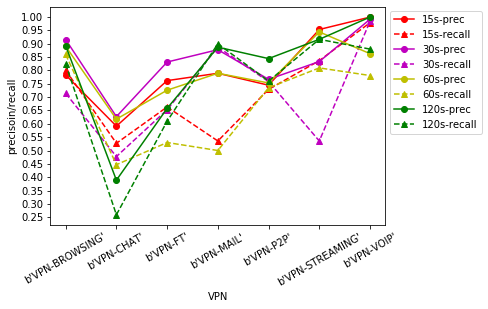

In [55]:
x = range(0,7)
p1, = plt.plot(x, knn_metric_B_res['15s']['VPN']['precision'], '-o', color = 'r')
p2, = plt.plot(x, knn_metric_B_res['15s']['VPN']['recall'], '--^', color = 'r')

p3, = plt.plot(x, knn_metric_B_res['30s']['VPN']['precision'],  '-o', color = 'm')
p4, = plt.plot(x, knn_metric_B_res['30s']['VPN']['recall'], '--^', color = 'm')

p5, = plt.plot(x, knn_metric_B_res['60s']['VPN']['precision'],'-o', color = 'y')
p6, = plt.plot(x, knn_metric_B_res['60s']['VPN']['recall'], '--^', color = 'y')

p7, = plt.plot(x, knn_metric_B_res['120s']['VPN']['precision'], '-o', color = 'g')
p8, = plt.plot(x, knn_metric_B_res['120s']['VPN']['recall'], '--^', color = 'g')

plt.xlabel('VPN')
plt.ylabel('precisoin/recall')
#设置刻度
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(.05)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

_xtick_labels = list(class_map_B.keys())[:7]
plt.xticks(x, _xtick_labels, rotation=30)
plt.legend(handles = [p1,p2,p3,p4,p5,p6,p7,p8], labels = ['15s-prec','15s-recall',
                                       '30s-prec','30s-recall',
                                       '60s-prec','60s-recall',
                                       '120s-prec','120s-recall'],
          bbox_to_anchor=(1,.7), loc='center left')
plt.show()

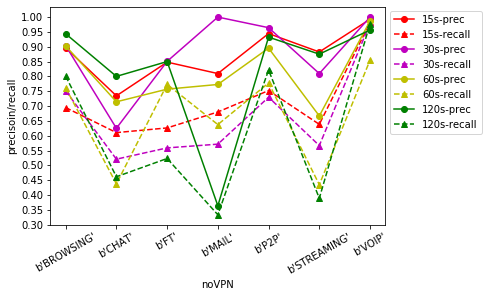

In [56]:
x = range(0,7)
p1, = plt.plot(x, knn_metric_B_res['15s']['noVPN']['precision'], '-o', color = 'r')
p2, = plt.plot(x, knn_metric_B_res['15s']['noVPN']['recall'], '--^', color = 'r')

p3, = plt.plot(x, knn_metric_B_res['30s']['noVPN']['precision'],  '-o', color = 'm')
p4, = plt.plot(x, knn_metric_B_res['30s']['noVPN']['recall'], '--^', color = 'm')

p5, = plt.plot(x, knn_metric_B_res['60s']['noVPN']['precision'],'-o', color = 'y')
p6, = plt.plot(x, knn_metric_B_res['60s']['noVPN']['recall'], '--^', color = 'y')

p7, = plt.plot(x, knn_metric_B_res['120s']['noVPN']['precision'], '-o', color = 'g')
p8, = plt.plot(x, knn_metric_B_res['120s']['noVPN']['recall'], '--^', color = 'g')

plt.xlabel('noVPN')
plt.ylabel('precisoin/recall')
#设置刻度
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(.05)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

_xtick_labels = list(class_map_B.keys())[7:14]
plt.xticks(x, _xtick_labels, rotation=30)
plt.legend(handles = [p1,p2,p3,p4,p5,p6,p7,p8], labels = ['15s-prec','15s-recall',
                                       '30s-prec','30s-recall',
                                       '60s-prec','60s-recall',
                                       '120s-prec','120s-recall'],
          bbox_to_anchor=(1,.7), loc='center left')
plt.show()